# Capstone Project 1: Analysis

This analysis uses Logistic regression for classification.  Can we predict the region, based on price and points? Additionally, knn is used as a model along with logistic regression. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
winedata = pd.read_csv("cleaned_wine_data.csv")

### Predicting Region for French Wines

In [3]:
frenchwines = winedata[winedata['country'] == 'France'].reset_index()
frenchwines.head()

,index,Unnamed: 0,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery
0,6,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
1,8,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
2,10,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
3,37,42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy
4,44,49,France,"Soft and fruity, this is a generous, ripe wine...",Eté Indien,86,14.0,Beaujolais,Brouilly,Roger Voss,@vossroger,Vignerons de Bel Air 2011 Eté Indien (Brouilly),Gamay,Vignerons de Bel Air


In [4]:
frenchwines["label"] = frenchwines["region"].astype('category')
frenchwines["label"] = frenchwines["label"].cat.codes
frenchwines.label.unique()

array([ 0,  1,  2,  4,  3,  5, 10,  9,  6,  8,  7])

In [5]:
frenchwines.head(15)

,index,Unnamed: 0,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery,label
0,6,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,0
1,8,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,0
2,10,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,0
3,37,42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,1
4,44,49,France,"Soft and fruity, this is a generous, ripe wine...",Eté Indien,86,14.0,Beaujolais,Brouilly,Roger Voss,@vossroger,Vignerons de Bel Air 2011 Eté Indien (Brouilly),Gamay,Vignerons de Bel Air,1
5,47,53,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'Amélie,85,15.0,Bordeaux,Bordeaux Blanc,Roger Voss,@vossroger,Château de Sours 2011 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours,2
6,56,63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,Roger Voss,@vossroger,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,4
7,58,65,France,"From the warm 2015 vintage, this is a soft and...",NaN,86,24.0,Burgundy,Chablis,Roger Voss,@vossroger,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,3
8,59,66,France,"This soft, rounded wine is ripe with generous ...",NaN,86,15.0,Burgundy,Mâcon-Milly Lamartine,Roger Voss,@vossroger,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,3
9,62,69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,Roger Voss,@vossroger,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,4


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
feature_cols = ['points', 'price']
X = frenchwines[feature_cols] # Features
y = frenchwines.label # Target variable

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 83,   0, 392,  44,   0,   0,   0,   0,   0,   0,   0],
       [ 17,   0, 178,   6,   0,   0,   0,   0,   0,   0,   0],
       [ 37,   0, 915,  85,   0,   0,   0,   0,   0,   0,   0],
       [ 17,   0, 464, 283,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 205, 183,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 155,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 139,   5,   0,   0,   0,   0,   0,   0,   0],
       [ 29,   0, 333,  24,   0,   0,   0,   0,   0,   0,   0],
       [ 13,   0, 243,  12,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0, 192,  63,   0,   0,   0,   0,   0,   0,   0],
       [ 40,   0, 253,  20,   0,   0,   0,   0,   0,   0,   0]])

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.28825382538253824


This is very low accuracy -- perhaps there are too many labels, and it would make more sense to subdivide the French wines into two categories: cheap or expensive, based on prior analysis.  This approach makes sense, given the fact that linear regression is mainly used in cases when the output is boolean (https://medium.com/@sangha_deb/naive-bayes-vs-logistic-regression-a319b07a5d4c).

In [10]:
def label_fr_region (row):
    if row['region'] == 'Burgundy' or row['region'] == 'Champagne':
        return 0
    else:
        return 1
#frenchwines.apply (lambda row: label_fr_region(row), axis=1)
frenchwines['new_region_label'] = frenchwines.apply (lambda row: label_fr_region(row), axis=1)
frenchwines.head(50)

,index,Unnamed: 0,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery,label,new_region_label
0,6,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,0,1
1,8,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,0,1
2,10,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,0,1
3,37,42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,1,1
4,44,49,France,"Soft and fruity, this is a generous, ripe wine...",Eté Indien,86,14.0,Beaujolais,Brouilly,Roger Voss,@vossroger,Vignerons de Bel Air 2011 Eté Indien (Brouilly),Gamay,Vignerons de Bel Air,1,1
5,47,53,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'Amélie,85,15.0,Bordeaux,Bordeaux Blanc,Roger Voss,@vossroger,Château de Sours 2011 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours,2,1
6,56,63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,Roger Voss,@vossroger,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,4,0
7,58,65,France,"From the warm 2015 vintage, this is a soft and...",NaN,86,24.0,Burgundy,Chablis,Roger Voss,@vossroger,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,3,0
8,59,66,France,"This soft, rounded wine is ripe with generous ...",NaN,86,15.0,Burgundy,Mâcon-Milly Lamartine,Roger Voss,@vossroger,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,3,0
9,62,69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,Roger Voss,@vossroger,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,4,0


In [12]:
feature_cols = ['points', 'price']
X = frenchwines[feature_cols] # Features
y = frenchwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 212,  941],
       [  80, 3211]])

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7702520252025202


The accuracy is much higher from subdividing the region into two categories.  Thus, logistic regression, can, with almost 80% accuracy predict whether a given French wine is from the Champagne or Burgundy regions, as opposed to other regions.

In [14]:
feature_cols = ['points']
X = frenchwines[feature_cols] # Features
y = frenchwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7405490549054905


In [15]:
feature_cols = ['price']
X = frenchwines[feature_cols] # Features
y = frenchwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7702520252025202


In [16]:
feature_cols = ['price','points']
X = frenchwines[feature_cols] # Features
y = frenchwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7702520252025202


Perhaps logistic regression isn't the best model.  Let's try knn. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.8181818181818182


K-nearest Neighbors gives us about 82% predictive accuracy, and, thus, is a good model to use for this task.

## The Issue of Unbalanced Data

It is possible that the results above are misleadingly accurate due to an unbalanced dataset.

In [20]:
counts = frenchwines.new_region_label.value_counts()
print('Burgundy or Champagne Wines:', counts[0])
print('Other French Wines:', counts[1])
print('Proportion:', round(counts[0] / counts[1], 2), ': 1')

Burgundy or Champagne Wines: 4489
Other French Wines: 13287
Proportion: 0.34 : 1


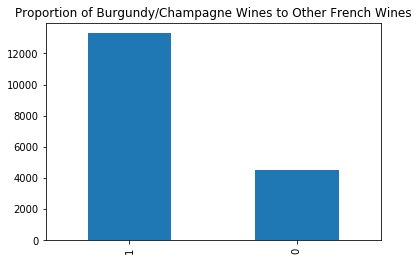

In [22]:
counts.plot(kind='bar', title='Proportion of Burgundy/Champagne Wines to Other French Wines')

The data isn't extremely unbalanced, but there is still more than twice the amount of data in category 1.  Let's do some resampling to make this data more balanced.

In [23]:
count_class_0, count_class_1 = frenchwines.new_region_label.value_counts()
print (count_class_0)
print (count_class_1)



13287
4489


### Undersampling 

Random under-sampling:
1    4489
0    4489
Name: new_region_label, dtype: int64


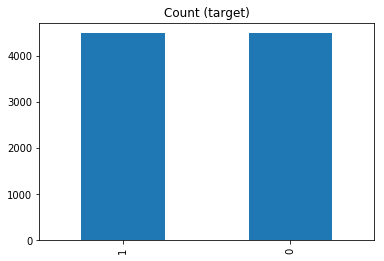

In [35]:
df_class_burg_or_champ = frenchwines[frenchwines.new_region_label == 0]
df_class_other_fren_wines = frenchwines[frenchwines.new_region_label == 1]
df_class_other_fren_wines_under = df_class_other_fren_wines.sample(count_class_1)
df_test_under = pd.concat([df_class_other_fren_wines_under, df_class_burg_or_champ], axis=0)
print('Random under-sampling:')
print(df_test_under.new_region_label.value_counts())

df_test_under.new_region_label.value_counts().plot(kind='bar', title='Proportion of Burgundy/Champagne Wines to Other French Wines');

In [36]:
feature_cols = ['price','points']
X = df_test_under[feature_cols] # Features
y = df_test_under.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7358574610244989


In [37]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7599109131403118


### Oversampling

Random over-sampling:
1    13287
0    13287
Name: new_region_label, dtype: int64


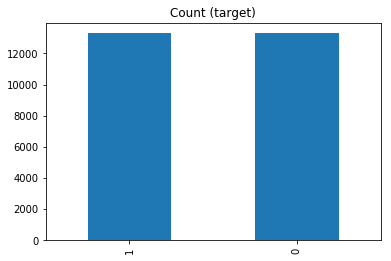

In [39]:
df_class_0_over = df_class_burg_or_champ.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_other_fren_wines, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.new_region_label.value_counts())

df_test_over.new_region_label.value_counts().plot(kind='bar', title='Proportion of Burgundy/Champagne Wines to Other French Wines');

In [40]:
X = df_test_over[feature_cols] # Features
y = df_test_over.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7308850090307044


In [41]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7703190848886213


For both undersampling and oversampling, the results for the balanced data are slightly less accurate than they are for the balanced data. Knn with the oversampled data provides the greatest accuracy.

# Predicting Region for Italian Wines

In [42]:
italianwines = winedata[winedata['country'] == 'Italy'].reset_index()
italianwines["label"] = italianwines["region"].astype('category')
italianwines["label"] = italianwines["label"].cat.codes
italianwines.label.unique()

array([6, 7, 0, 8, 5, 3, 9, 1, 2, 4])

In [43]:
italianwines.head(15)

,index,Unnamed: 0,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery,label
0,5,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,6
1,20,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,6
2,22,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,6
3,24,26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,6
4,25,27,Italy,"Aromas recall ripe dark berry, toast and a whi...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,6
5,26,28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.0,Sicily & Sardinia,Cerasuolo di Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo,6
6,32,37,Italy,This concentrated Cabernet offers aromas of cu...,Missoni,86,21.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,6
7,33,38,Italy,"Inky in color, this wine has plump aromas of r...",I Tratturi,86,11.0,Southern Italy,Puglia,NaN,NaN,Feudi di San Marzano 2011 I Tratturi Primitivo...,Primitivo,Feudi di San Marzano,7
8,34,39,Italy,"Part of the natural wine movement, this wine i...",Purato Made With Organic Grapes,86,12.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudo di Santa Tresa 2011 Purato Made With Org...,Nero d'Avola,Feudo di Santa Tresa,6
9,35,40,Italy,Catarratto is one of Sicily's most widely farm...,NaN,86,17.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudo Montoni 2011 Catarratto (Sicilia),Catarratto,Feudo Montoni,6


In [44]:
feature_cols = ['points', 'price']
X = italianwines[feature_cols] # Features
y = italianwines.label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   0,    0,    0,    0,    0,    0,    0,    0,  262,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   18,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  114,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  491,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    3,    0],
       [   0,    0,    0,    0,    0,    8,    0,    0,  766,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  400,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  292,    0],
       [   0,    0,    0,    0,    0,   14,    0,    0, 1281,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,  579,    0]])

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.30480018917001656


As with the French wines, this is fairly low predictive accuracy, though it is somewhat better. 

In [46]:
def label_it_region (row):
    if row['region'] == 'Piedmont' or row['region'] == 'Tuscany':
        return 0
    else:
        return 1
#frenchwines.apply (lambda row: label_fr_region(row), axis=1)
italianwines['new_region_label'] = italianwines.apply (lambda row: label_it_region(row), axis=1)
italianwines.head(500)

,index,Unnamed: 0,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery,label,new_region_label
0,5,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,6,1
1,20,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,6,1
2,22,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,6,1
3,24,26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,6,1
4,25,27,Italy,"Aromas recall ripe dark berry, toast and a whi...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,6,1
5,26,28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.0,Sicily & Sardinia,Cerasuolo di Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo,6,1
6,32,37,Italy,This concentrated Cabernet offers aromas of cu...,Missoni,86,21.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,6,1
7,33,38,Italy,"Inky in color, this wine has plump aromas of r...",I Tratturi,86,11.0,Southern Italy,Puglia,NaN,NaN,Feudi di San Marzano 2011 I Tratturi Primitivo...,Primitivo,Feudi di San Marzano,7,1
8,34,39,Italy,"Part of the natural wine movement, this wine i...",Purato Made With Organic Grapes,86,12.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudo di Santa Tresa 2011 Purato Made With Org...,Nero d'Avola,Feudo di Santa Tresa,6,1
9,35,40,Italy,Catarratto is one of Sicily's most widely farm...,NaN,86,17.0,Sicily & Sardinia,Sicilia,NaN,NaN,Feudo Montoni 2011 Catarratto (Sicilia),Catarratto,Feudo Montoni,6,1


In [47]:
feature_cols = ['price','points']
X = italianwines[feature_cols] # Features
y = italianwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6566564199574367


In [48]:
feature_cols = ['price']
X = italianwines[feature_cols] # Features
y = italianwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6580751950815795


In [49]:
feature_cols = ['points']
X = italianwines[feature_cols] # Features
y = italianwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5980137148262


Price is a much more useful predictive feature than points.  Let's also try using knn here, instead of logistic regression. 

In [50]:
feature_cols = ['price','points']
X = italianwines[feature_cols] # Features
y = italianwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.6445968314022228


For the Italian wine data, unlike the French, knn is about as accurate of a model as logistic regression, and is actually a little less accurate. 

# Data Balancing

In [76]:
counts = italianwines.new_region_label.value_counts()
print (counts)

1    8697
0    8217
Name: new_region_label, dtype: int64


In [77]:
print('Piedmont or Tuscany Wines:', counts[0])
print('Other Italian Wines:', counts[1])
print('Proportion:', round(counts[0] / counts[1], 2), ': 1')

Piedmont or Tuscany Wines: 8217
Other Italian Wines: 8697
Proportion: 0.94 : 1


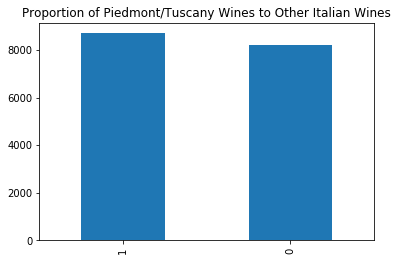

In [78]:
counts.plot(kind='bar', title='Proportion of Piedmont/Tuscany Wines to Other Italian Wines')

Unlike the French wines, the data for the Italian wines is much more balanced.  Thus, for this data, under-sampling and over-sampling are likely unnecessary. Let's apply oversampling anyhow, just in case. 

In [79]:
df_class_pied_or_tusc = italianwines[italianwines.new_region_label == 0]
df_class_other_ital_wines = italianwines[italianwines.new_region_label == 1]

In [80]:
count_class_0, count_class_1 = italianwines.new_region_label.value_counts()
print (count_class_0)
print (count_class_1)

8697
8217


Random over-sampling:
1    8697
0    8697
Name: new_region_label, dtype: int64


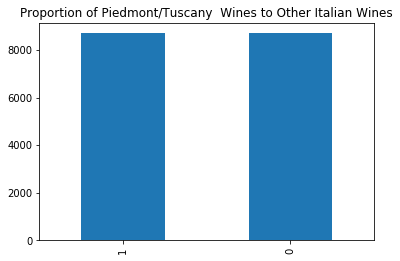

In [81]:
df_class_0_over = df_class_pied_or_tusc.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_other_ital_wines, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.new_region_label.value_counts())

df_test_over.new_region_label.value_counts().plot(kind='bar', title='Proportion of Piedmont/Tuscany  Wines to Other Italian Wines');

In [82]:
X = df_test_over[feature_cols] # Features
y = df_test_over.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6670498965279374


The score with the balanced data is barely different for the Italian wines.  This is most likely because the data was not very unbalanced (particularly in comparison with the French wines).

## California Wines

In [91]:
uswines = winedata[winedata['country'] == 'US'].reset_index()
caliwines = uswines[uswines['region'] == 'California']
caliwines.sub_region.unique()

array(['Napa Valley', 'Alexander Valley', 'Central Coast', 'Paso Robles',
       'Sonoma Coast', 'Clarksburg', 'Dry Creek Valley', 'Sonoma Valley',
       'Lake County', 'North Coast', 'Santa Ynez Valley', 'California',
       'Howell Mountain', 'Calistoga', 'Knights Valley', 'Sonoma County',
       'Santa Clara Valley', 'Yountville', 'Rockpile',
       'Santa Lucia Highlands', 'Spring Mountain District', 'Monterey',
       'Carmel Valley', 'Santa Cruz Mountains', 'Edna Valley',
       'Russian River Valley', 'Arroyo Seco', 'Anderson Valley',
       'Nevada County', 'Santa Barbara County',
       'Diamond Mountain District', 'Mendocino', 'Sonoma Mountain',
       'Amador County', 'St. Helena', 'Cole Ranch', 'Santa Maria Valley',
       'Arroyo Grande Valley', 'Mendocino County', 'Rutherford',
       'Templeton Gap District', 'Carneros', 'Sta. Rita Hills',
       'El Dorado', 'Suisun Valley', 'Lodi', 'Monterey County',
       'Chiles Valley', 'Calaveras County', 'Ballard Canyon',
      

In [92]:
calsubregions = caliwines['sub_region'].value_counts() > 500
calsubregions = calsubregions[calsubregions]
calsubregionslist = list(calsubregions.index)
modified_caliwines = caliwines[caliwines['sub_region'].isin(calsubregionslist)]
modified_caliwines.sub_region.unique()

array(['Napa Valley', 'Alexander Valley', 'Central Coast', 'Paso Robles',
       'Sonoma Coast', 'Dry Creek Valley', 'Sonoma Valley',
       'Santa Ynez Valley', 'California', 'Sonoma County',
       'Santa Lucia Highlands', 'Santa Cruz Mountains',
       'Russian River Valley', 'Anderson Valley', 'Santa Barbara County',
       'Santa Maria Valley', 'Carneros', 'Sta. Rita Hills', 'Lodi'],
      dtype=object)

In [93]:
modified_caliwines["label"] = modified_caliwines["sub_region"].astype('category')
modified_caliwines["label"] = modified_caliwines["label"].cat.codes
italianwines.label.unique()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([6, 7, 0, 8, 5, 3, 9, 1, 2, 4])

In [94]:
feature_cols = ['points', 'price']
X = modified_caliwines[feature_cols] # Features
y = modified_caliwines.label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2361393096985788


Again, this accuracy is low.  Let's make two categories again for the California Wines, based on the analysis from the statistics and data visualization sections of the report. 

In [95]:
def label_cal_region (row):
    if row['sub_region'] == 'Napa Valley' or row['sub_region'] == 'Sonoma Coast' or row['sub_region'] == 'Sta. Rita Hills':
        return 0
    else:
        return 1

modified_caliwines['new_region_label'] = modified_caliwines.apply(lambda row: label_cal_region(row), axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [96]:
feature_cols = ['price','points']
X = modified_caliwines[feature_cols] # Features
y = modified_caliwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7510541933468686


In [97]:
feature_cols = ['points']
X = modified_caliwines[feature_cols] # Features
y = modified_caliwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7298141496173669


Again, as with the Italian wines, price is a better predictor than points. 

In [98]:
feature_cols = ['price','points']
X = modified_caliwines[feature_cols] # Features
y = modified_caliwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7245041386849914


Logistic regression is somewhat more accurate than knn for the California wines in the dataset. 

## Data Balancing

In [99]:
counts = modified_caliwines.new_region_label.value_counts()
print('Napa, Sonoma, or Sta. Rita Hills Wines:', counts[0])
print('Other California Wines:', counts[1])
print('Proportion:', round(counts[0] / counts[1], 2), ': 1')

Napa, Sonoma, or Sta. Rita Hills Wines: 6913
Other California Wines: 18696
Proportion: 0.37 : 1


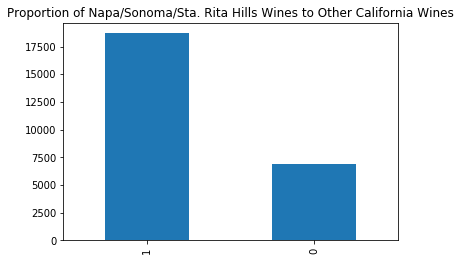

In [100]:
counts.plot(kind='bar', title='Proportion of Napa/Sonoma/Sta. Rita Hills Wines to Other California Wines')

Like the French wine data, the California wine data is somewhat unbalance between the categories "Napa/Sonoma/Sta. Rita Hills wines" and "all other California wines."  This can be addressed by oversampling the Bapa/Somona/Sta. Rita Hills wines.

In [101]:
other_cali_wines, napa_sonoma_rita_wines = modified_caliwines.new_region_label.value_counts()
print (other_cali_wines)
print (napa_sonoma_rita_wines)

18696
6913


In [102]:
other_cali_wines, napa_sonoma_rita_wines = modified_caliwines.new_region_label.value_counts()
print (other_cali_wines)
print (napa_sonoma_rita_wines)

18696
6913


In [103]:
df_class_napa_sonoma_rita_wines = modified_caliwines[modified_caliwines.new_region_label == 0]
df_class_other_cali_wines = modified_caliwines[modified_caliwines.new_region_label == 1]

Random over-sampling:
1    18696
0    18696
Name: new_region_label, dtype: int64


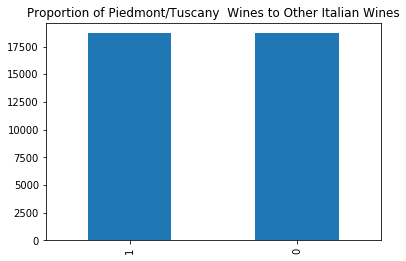

In [104]:
df_class_0_over = df_class_napa_sonoma_rita_wines.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_other_cali_wines, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.new_region_label.value_counts())

df_test_over.new_region_label.value_counts().plot(kind='bar', title='Proportion of Piedmont/Tuscany  Wines to Other Italian Wines');

In [105]:
feature_cols = ['price','points']
X = df_test_over[feature_cols] # Features
y = df_test_over.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6370346598202824


In [106]:
X = modified_caliwines[feature_cols] # Features
y = modified_caliwines.new_region_label # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7245041386849914


When the California wine data undergoes over-sampling, knn ends up being significantly (almost 10%) more accurate than logistic regression.  Interestingly, this is the opposite of what was observed in the unsampled California wine data.